# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [1]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [2]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from urllib.parse import urljoin

## **Scrapping Movies Data**

In [3]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [4]:
# Specifying the URL from which movies related data will be fetched
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page = requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup = BeautifulSoup(page.text, 'html.parser')



In [5]:
# Lists to store data
movie_urls = []
movie_names = []


In [6]:
# Extract movie URLs and prepend the base URL
base_url = 'https://www.justwatch.com'
movie_links = soup.find_all('a', class_='title-list-grid__item--link')
movie_urls_list = [urljoin(base_url, link['href']) for link in movie_links]

In [7]:
# Create a list of movie names and URLs
for movie_url in movie_urls_list:
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
        movie_names.append(movie_name)
        movie_urls.append(movie_url)
    else:
        movie_names.append("Movie name not found")
        movie_urls.append("URL not found")

# Ensure that the lengths match before creating the DataFrame
if len(movie_urls) == len(movie_names):
    # Create a DataFrame from the lists
    data = {
        'Movie Name': movie_names,
        'Movie URL': movie_urls
    }

    # Create a DataFrame from the dictionary
    movies_dataframe = pd.DataFrame(data)

    # Display the DataFrame
    print(movies_dataframe)
else:
    print("Error: Lengths of Movie URLs List and Movie Names List do not match.")


              Movie Name                                          Movie URL
0               Aavesham   https://www.justwatch.com/in/movie/aavesham-2024
1        Laapataa Ladies  https://www.justwatch.com/in/movie/laapataa-la...
2         Manjummel Boys  https://www.justwatch.com/in/movie/manjummel-boys
3                   Crew   https://www.justwatch.com/in/movie/the-crew-2024
4        Madgaon Express  https://www.justwatch.com/in/movie/madgaon-exp...
..                   ...                                                ...
95  Movie name not found                                      URL not found
96  Movie name not found                                      URL not found
97  Movie name not found                                      URL not found
98  Movie name not found                                      URL not found
99  Movie name not found                                      URL not found

[100 rows x 2 columns]


## **Scrapping Movie Title**

In [8]:
# Write Your Code here
soup = BeautifulSoup(page.text, 'html.parser')


In [9]:
# List to store movie titles
movie_titles = []

# All anchors with class 'title-list-grid__item--link'
movie_anchors = soup.find_all('a', class_='title-list-grid__item--link')

In [10]:
# Extract movie titles from the 'img' tag within each anchor
for movie_anchor in movie_anchors:
    img_tag = movie_anchor.find('img')
    if img_tag:
        movie_title = img_tag['alt']
        movie_titles.append(movie_title)
    else:
        movie_titles.append("Title not found")

# Create a DataFrame with movie titles
titles_dataframe = pd.DataFrame({'Title': movie_titles})

# Display the DataFrame
titles_dataframe


,Title
0,Aavesham
1,Laapataa Ladies
2,Manjummel Boys
3,Crew
4,Madgaon Express
...,...
95,Fighter
96,Kahaani
97,Dada
98,Tumbbad


## **Scrapping release Year**

In [11]:
# Write Your Code here
# All anchor tags with class "title-list-grid__item--link"
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Lists to store data
movie_names = []
release_years_list = []

In [12]:
# Iterate through each movie URL and scrape data
for movie_link in movie_links:
    # Extract movie URL and prepend the base URL
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the span tag with class "text-muted" inside the h1 tag
    release_span = soup_movie.find('span', class_='text-muted')

    # Extract the release year from the release span
    if release_span:
        release_year = release_span.text.strip().replace('(', '').replace(')', '')
    else:
        release_year = "Release year not found"

    # Append data to lists
    movie_names.append(movie_name)
    release_years_list.append(release_year)

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Release Year': release_years_list
})

# Display the DataFrame
movies_dataframe


,Movie Name,Release Year
0,Aavesham,2024
1,Laapataa Ladies,2024
2,Manjummel Boys,2024
3,Crew,2024
4,Madgaon Express,2024
...,...,...
95,Movie name not found,Release year not found
96,Movie name not found,Release year not found
97,Movie name not found,Release year not found
98,Tumbbad,2018


## **Scrapping Genres**

In [13]:
# Write Your Code here
# Find all anchor tags with class "title-list-grid__item--link"
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Lists to store data
movie_names = []
genres_list = []

In [14]:
# Iterate through each movie URL and scrape data
for movie_link in movie_links:
    # Extract movie URL and prepend the base URL
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the "Genres" label
    genres_label = soup_movie.find('h3', class_='detail-infos__subheading', string='Genres')

    # Check if the "Genres" label is found
    if genres_label:
        # Find the corresponding div tag with genres information
        genres_div = genres_label.find_next('div', class_='detail-infos__value')

        # Extract the genres
        if genres_div:
            genres = genres_div.text.strip()
        else:
            genres = "Genres not found"
    else:
        genres = "Genres not found"

    # Append data to lists
    movie_names.append(movie_name)
    genres_list.append(genres)

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Genres': genres_list
})

# Display the DataFrame
movies_dataframe


,Movie Name,Genres
0,Aavesham,2h 38min
1,Laapataa Ladies,2h 2min
2,Manjummel Boys,2h 15min
3,Crew,1h 58min
4,Madgaon Express,2h 23min
...,...,...
95,Movie name not found,Genres not found
96,Movie name not found,Genres not found
97,Movie name not found,Genres not found
98,Movie name not found,Genres not found


## **Scrapping IMBD Rating**

In [19]:
# Write Your Code here
# Lists to store data
movie_names = []
imdb_ratings_list = []

In [20]:
# Iterate through each movie URL and scrape data
for movie_url in movie_urls:
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified div and class
    title_block = soup_movie.find('div', class_='title-block')
    if title_block:
        movie_name = title_block.find('h1').text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the div tag containing IMDb rating
    div_tags = soup_movie.find_all('div', class_='jw-scoring-listing__rating')  # Replace with the actual class

    # Extract the IMDb rating
    imdb_rating = None
    for div_tag in div_tags:
        img_tag = div_tag.find('img', alt='IMDB')
        if img_tag:
            imdb_rating_span = div_tag.find_next('span')
            if imdb_rating_span:
                # Extract only the numeric part of IMDb rating
                imdb_rating = imdb_rating_span.text.strip().split()[0]
                break

    # Append data to lists
    movie_names.append(movie_name)
    imdb_ratings_list.append(imdb_rating)
# Create a DataFrame from the lists
data = {
    'Movie Name': movie_names,
    'IMDb Rating': imdb_ratings_list
}

# Create a DataFrame from the dictionary
movies_dataframe = pd.DataFrame(data)

# Display the DataFrame
movies_dataframe


,Movie Name,IMDb Rating
0,Angithee 2,6.1
1,Angithee 2,6.1
2,Angithee 2,6.1
3,Angithee 2,6.1
4,Angithee 2,6.1
...,...,...
95,Movie name not found,None
96,Movie name not found,None
97,Movie name not found,None
98,Movie name not found,None


## **Scrapping Runtime/Duration**

In [21]:
# Write Your Code here
# Lists to store data
movie_names = []
runtimes_list = []



In [22]:
# Iterate through each movie URL and scrape data
for movie_url in movie_urls:
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the "Runtime" label
    runtime_label = soup_movie.find('h3', class_='detail-infos__subheading', string='Runtime')

    # Check if the "Runtime" label is found
    if runtime_label:
        # Find the corresponding div tag with runtime information
        runtime_div = runtime_label.find_next('div', class_='detail-infos__value')

        # Extract the numeric part of the runtime
        if runtime_div:
            runtime = runtime_div.text.strip().split()[0]
        else:
            runtime = "Runtime information not found"
    else:
        runtime = "Runtime information not found"

    # Append data to lists
    movie_names.append(movie_name)
    runtimes_list.append(runtime)

# Create a DataFrame from the lists
data = {
    'Movie Name': movie_names,
    'Runtime': runtimes_list
}

# Create a DataFrame from the dictionary
movies_dataframe = pd.DataFrame(data)

# Display the DataFrame
movies_dataframe


,Movie Name,Runtime
0,Angithee 2,1h
1,Angithee 2,1h
2,Angithee 2,1h
3,Movie name not found,Runtime information not found
4,Movie name not found,Runtime information not found
...,...,...
95,Movie name not found,Runtime information not found
96,Movie name not found,Runtime information not found
97,Movie name not found,Runtime information not found
98,Movie name not found,Runtime information not found


## **Scrapping Age Rating**

In [23]:
# Write Your Code here
# Find all anchor tags with class "title-list-grid__item--link"
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Lists to store data
movie_names = []
age_ratings_list = []

In [24]:
# Iterate through each movie URL and scrape data
for movie_link in movie_links:
    # Extract movie URL and prepend the base URL
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the "Age rating" label
    age_rating_label = soup_movie.find('h3', class_='detail-infos__subheading', string='Age rating')

    # Check if the "Age rating" label is found
    if age_rating_label:
        # Find the corresponding div tag with age rating information
        age_rating_div = age_rating_label.find_next('div', class_='detail-infos__value')

        # Extract the age rating
        if age_rating_div:
            age_rating = age_rating_div.text.strip()
        else:
            age_rating = "Age rating not found"
    else:
        age_rating = "Age rating not found"

    # Append data to lists
    movie_names.append(movie_name)
    age_ratings_list.append(age_rating)

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Age Rating': age_ratings_list
})

# Display the DataFrame
movies_dataframe


,Movie Name,Age Rating
0,Aavesham,Age rating not found
1,Laapataa Ladies,UA
2,Manjummel Boys,UA
3,Movie name not found,Age rating not found
4,Movie name not found,Age rating not found
...,...,...
95,Movie name not found,Age rating not found
96,Movie name not found,Age rating not found
97,Movie name not found,Age rating not found
98,Movie name not found,Age rating not found


## **Fetching Streaming Service Details**

In [25]:
# Write Your Code here
# Lists to store movie details
movie_names = []
streaming_availability = []

# Find all anchor tags with class "title-list-grid__item--link"
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Extract movie URLs and prepend the base URL
base_url = 'https://www.justwatch.com'
movie_urls = [urljoin(base_url, link['href']) for link in movie_links]


In [26]:
# Iterate through each movie URL and scrape streaming availability
for movie_url in movie_urls:
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    movie_name = h1_tag.text.strip() if h1_tag else "Movie name not found"
    movie_names.append(movie_name)

    # Find the streaming availability information
    streaming_section = soup_movie.find('section', {'data-v-3f103c69': True, 'data-v-1d90f11e': True})

    if streaming_section:
        # Extract the streaming availability text
        article_heading = streaming_section.find('article', {'data-v-3f103c69': True}).find('h2', {'data-v-3f103c69': True, 'class': 'heading'})
        streaming_text = article_heading.find_next('p').text.strip() if article_heading else "Streaming information not found"

        # Check if "streaming on" is present in the streaming text
        if "streaming on" in streaming_text:
            # Extract the text after "streaming on"
            platform_start_index = streaming_text.rfind("streaming on") + len("streaming on")
            platform = streaming_text[platform_start_index:].strip()
            streaming_availability.append(platform)
        else:
            streaming_availability.append("Streaming not available")
    else:
        streaming_availability.append("Streaming information not found")

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Streaming Availability': streaming_availability
})

# Display the DataFrame
movies_dataframe


,Movie Name,Streaming Availability
0,Aavesham,Streaming information not found
1,Laapataa Ladies,Streaming information not found
2,Manjummel Boys,Streaming information not found
3,Crew,Streaming information not found
4,Madgaon Express,Streaming information not found
...,...,...
95,Movie name not found,Streaming information not found
96,Movie name not found,Streaming information not found
97,Movie name not found,Streaming information not found
98,Movie name not found,Streaming information not found


## **Now Creating Movies DataFrame**

In [27]:
# Write Your Code here
# Create a dictionary with the data
data = {
    'movie_titles': movie_titles,
    'movie_urls': movie_urls_list,
    'movies_release_years': release_years_list,
    'movies_genres': genres_list,
    'movies_runtimes': runtimes_list,
    'movies_age_ratings': age_ratings_list,
    'movies_imdb_ratings': imdb_ratings_list,
    'movies_streaming_availability': streaming_availability,

}



In [28]:
# Create a DataFrame from the dictionary
movies_dataframe = pd.DataFrame(data)


In [29]:
# Display the DataFrame
movies_dataframe.head(5)



,movie_titles,movie_urls,movies_release_years,movies_genres,movies_runtimes,movies_age_ratings,movies_imdb_ratings,movies_streaming_availability
0,Aavesham,https://www.justwatch.com/in/movie/aavesham-2024,2024,2h 38min,1h,Age rating not found,6.1,Streaming information not found
1,Laapataa Ladies,https://www.justwatch.com/in/movie/laapataa-la...,2024,2h 2min,1h,UA,6.1,Streaming information not found
2,Manjummel Boys,https://www.justwatch.com/in/movie/manjummel-boys,2024,2h 15min,1h,UA,6.1,Streaming information not found
3,Crew,https://www.justwatch.com/in/movie/the-crew-2024,2024,1h 58min,Runtime information not found,Age rating not found,6.1,Streaming information not found
4,Madgaon Express,https://www.justwatch.com/in/movie/madgaon-exp...,2024,2h 23min,Runtime information not found,Age rating not found,6.1,Streaming information not found


In [30]:
movies_dataframe.tail(5)

,movie_titles,movie_urls,movies_release_years,movies_genres,movies_runtimes,movies_age_ratings,movies_imdb_ratings,movies_streaming_availability
95,Fighter,https://www.justwatch.com/in/movie/fighter-2022,Release year not found,Genres not found,Runtime information not found,Age rating not found,None,Streaming information not found
96,Kahaani,https://www.justwatch.com/in/movie/kahaani,Release year not found,Genres not found,Runtime information not found,Age rating not found,None,Streaming information not found
97,Dada,https://www.justwatch.com/in/movie/dada-2023,Release year not found,Genres not found,Runtime information not found,Age rating not found,None,Streaming information not found
98,Tumbbad,https://www.justwatch.com/in/movie/tumbbad,2018,Genres not found,Runtime information not found,Age rating not found,None,Streaming information not found
99,Angithee 2,https://www.justwatch.com/in/movie/angithee-2,Release year not found,Genres not found,Runtime information not found,Age rating not found,None,Streaming information not found


## **Scraping TV  Show Data**

In [31]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup2=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup2.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [32]:
# Write Your Code here
# Specifying the URL from which TV show related data will be fetched
tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Sending an HTTP GET request to the URL
page = requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup2 = BeautifulSoup(page.text, 'html.parser')


In [33]:
# Lists to store data
tv_show_urls = []
tv_show_names = []

In [34]:
# Extract TV show URLs and prepend the base URL
base_url = 'https://www.justwatch.com'
tv_show_links = soup.find_all('a', class_='title-list-grid__item--link')
tv_show_urls_list = [urljoin(base_url, link['href']) for link in tv_show_links]


In [35]:
# Create a list of TV show names and URLs
for tv_show_url in tv_show_urls_list:
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show name within the specified h1 tag
    h1_tag = soup_tv_show.find('h1')
    if h1_tag:
        tv_show_name = h1_tag.text.strip()
        tv_show_names.append(tv_show_name)
        tv_show_urls.append(tv_show_url)
    else:
        tv_show_names.append("TV show name not found")
        tv_show_urls.append("URL not found")

# Ensure that the lengths match before creating the DataFrame
if len(tv_show_urls) == len(tv_show_names):
    # Create a DataFrame from the lists
    data = {
        'TV Show Name': tv_show_names,
        'TV Show URL': tv_show_urls
    }

    # Create a DataFrame from the dictionary
    tv_shows_dataframe = pd.DataFrame(data)

    # Display the DataFrame
    print(tv_shows_dataframe)
else:
    print("Error: Lengths of TV Show URLs List and TV Show Names List do not match.")


              TV Show Name                                        TV Show URL
0                 Aavesham   https://www.justwatch.com/in/movie/aavesham-2024
1          Laapataa Ladies  https://www.justwatch.com/in/movie/laapataa-la...
2           Manjummel Boys  https://www.justwatch.com/in/movie/manjummel-boys
3                     Crew   https://www.justwatch.com/in/movie/the-crew-2024
4          Madgaon Express  https://www.justwatch.com/in/movie/madgaon-exp...
..                     ...                                                ...
95  TV show name not found                                      URL not found
96  TV show name not found                                      URL not found
97  TV show name not found                                      URL not found
98  TV show name not found                                      URL not found
99  TV show name not found                                      URL not found

[100 rows x 2 columns]


## **Fetching Tv Show Title details**

In [36]:
# Write Your Code here
soup2 = BeautifulSoup(page.text, 'html.parser')

# List to store TV show titles
tv_show_titles = []

# Find all anchor tags with class 'title-list-grid__item--link'
tv_show_links = soup2.find_all('a', class_='title-list-grid__item--link')

In [37]:
# Extract TV show titles from the href attribute
for tv_show_link in tv_show_links:
    href = tv_show_link.get('href')
    if href:
        tv_show_name = href.split('/')[-1]  # Extract the last segment as the TV show name
        tv_show_titles.append(tv_show_name)
    else:
        tv_show_titles.append("Title not found")

# Create a DataFrame with TV show titles
tv_shows_dataframe = pd.DataFrame({'TV Show Title': tv_show_titles})

# Display the DataFrame
tv_shows_dataframe


,TV Show Title
0,panchayat
1,heeramandi
2,mirzapur
3,shogun-2024
4,murder-in-mahim
...,...
95,the-atypical-family
96,interview-with-the-vampire
97,the-railway-men-the-untold-story-of-bhopal-1984
98,loki


## **Fetching Release Year**

In [38]:
# Write Your Code here
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
release_years_list2 = []

# Find all anchor tags with class 'title-list-grid__item--link'
tv_show_links = soup2.find_all('a', class_='title-list-grid__item--link')



In [39]:
# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified h1 tag
    h1_tag = soup_tv_show.find('h1')
    if h1_tag:
        tv_show_title = h1_tag.text.strip()
        tv_show_titles.append(tv_show_title)
    else:
        tv_show_titles.append("TV show title not found")

    # Find the span tag with class "text-muted" inside the h1 tag
    release_span = soup_tv_show.find('span', class_='text-muted')

    # Extract the release year from the release span
    if release_span:
        release_year = release_span.text.strip().replace('(', '').replace(')', '')
        release_years_list2.append(release_year)
    else:
        release_years_list2.append("Release year not found")

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Release Year': release_years_list2
})

# Display the DataFrame
tv_shows_dataframe


,TV Show Title,Release Year
0,Panchayat,2020
1,Heeramandi: The Diamond Bazaar,2024
2,Mirzapur,2018
3,Shōgun,2024
4,Murder in Mahim,2024
...,...,...
95,TV show title not found,Release year not found
96,TV show title not found,Release year not found
97,TV show title not found,Release year not found
98,TV show title not found,Release year not found


## **Fetching TV Show Genre Details**

In [40]:
# Write Your Code here
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
genres_list2 = []

# Find all anchor tags with class 'title-list-grid__item--link'
tv_show_links = soup2.find_all('a', class_='title-list-grid__item--link')


In [41]:
# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified h1 tag
    h1_tag = soup_tv_show.find('h1')
    if h1_tag:
        tv_show_title = h1_tag.text.strip()
    else:
        tv_show_title = "TV show title not found"

    # Find the "Genres" label
    genres_label = soup_tv_show.find('h3', class_='detail-infos__subheading', string='Genres')

    # Check if the "Genres" label is found
    if genres_label:
        # Find the corresponding div tag with genres information
        genres_div = genres_label.find_next('div', class_='detail-infos__value')

        # Extract the genres
        if genres_div:
            tv_show_genres = genres_div.text.strip()
        else:
            tv_show_genres = "Genres not found"
    else:
        tv_show_genres = "Genres not found"

    # Append data to lists
    tv_show_titles.append(tv_show_title)
    genres_list2.append(tv_show_genres)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Genres': genres_list2
})

# Display the DataFrame
tv_shows_dataframe


,TV Show Title,Genres
0,Panchayat,35min
1,Heeramandi: The Diamond Bazaar,54min
2,Mirzapur,50min
3,Shōgun,59min
4,Murder in Mahim,43min
...,...,...
95,TV show title not found,Genres not found
96,TV show title not found,Genres not found
97,TV show title not found,Genres not found
98,TV show title not found,Genres not found


## **Fetching IMDB Rating Details**

In [42]:
# Write Your Code here
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
imdb_ratings_list2 = []


In [43]:
# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"

    # Find the div tag containing IMDb rating
    div_tags = soup_tv_show.find_all('div', class_='jw-scoring-listing__rating')  # Replace with the actual class

    # Extract the IMDb rating
    imdb_rating = None
    for div_tag in div_tags:
        img_tag = div_tag.find('img', alt='IMDB')
        if img_tag:
            imdb_rating_span = div_tag.find('span')
            if imdb_rating_span:
                # Extract only the numeric part of IMDb rating
                imdb_rating = imdb_rating_span.text.strip().split()[0]
                break

    # Append data to lists
    tv_show_titles.append(tv_show_title)
    imdb_ratings_list2.append(imdb_rating)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'IMDb Rating': imdb_ratings_list2
})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title,IMDb Rating
0,Panchayat,9.0
1,Heeramandi: The Diamond Bazaar,6.4
2,Mirzapur,8.5
3,Shōgun,8.7
4,Murder in Mahim,7.4
...,...,...
95,TV show title not found,None
96,TV show title not found,None
97,TV show title not found,None
98,TV show title not found,None


## **Fetching Age Rating Details**

In [44]:
# Write Your Code here
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
age_ratings_list2 = []


In [45]:
# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"

    # Find the "Age rating" label
    age_rating_label = soup_tv_show.find('h3', class_='detail-infos__subheading', string='Age rating')

    # Check if the "Age rating" label is found
    if age_rating_label:
        # Find the corresponding div tag with age rating information
        age_rating_div = age_rating_label.find_next('div', class_='detail-infos__value')

        # Extract the age rating
        if age_rating_div:
            age_rating = age_rating_div.text.strip()
        else:
            age_rating = "Age rating not found"
    else:
        age_rating = "Age rating not found"

    # Append data to lists
    tv_show_titles.append(tv_show_title)
    age_ratings_list2.append(age_rating)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Age Rating': age_ratings_list2
})

# Display the DataFrame
tv_shows_dataframe


,TV Show Title,Age Rating
0,Panchayat,Age rating not found
1,Heeramandi: The Diamond Bazaar,Age rating not found
2,Mirzapur,Age rating not found
3,Shōgun,Age rating not found
4,TV show title not found,Age rating not found
...,...,...
95,TV show title not found,Age rating not found
96,TV show title not found,Age rating not found
97,TV show title not found,Age rating not found
98,Loki,Age rating not found


## **Fetching Streaming Service details**

In [46]:
# Write Your Code here
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
streaming_availability_list2 = []

In [47]:
# Iterate through each TV show URL and scrape streaming availability
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"
    tv_show_titles.append(tv_show_title)

    # Find the streaming availability information
    streaming_section = soup_tv_show.find('section', {'data-v-3f103c69': True, 'data-v-1d90f11e': True})

    if streaming_section:
        # Extract the streaming availability text
        article_heading = streaming_section.find('article', {'data-v-3f103c69': True}).find('h2', {'data-v-3f103c69': True, 'class': 'heading'})
        streaming_text = article_heading.find_next('p').text.strip() if article_heading else "Streaming information not found"

        # Check if "streaming on" is present in the streaming text
        if "streaming on" in streaming_text:
            # Extract the text after "streaming on"
            platform_start_index = streaming_text.rfind("streaming on") + len("streaming on")
            platform = streaming_text[platform_start_index:].strip()
            streaming_availability_list2.append(platform)
        else:
            streaming_availability_list2.append("Streaming not available")
    else:
        streaming_availability_list2.append("Streaming information not found")

# Create a DataFrame from the lists
tv_shows_dataframe= pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Streaming Availability': streaming_availability_list2
})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title,Streaming Availability
0,Panchayat,Streaming information not found
1,Heeramandi: The Diamond Bazaar,Streaming information not found
2,Mirzapur,Streaming information not found
3,TV show title not found,Streaming information not found
4,TV show title not found,Streaming information not found
...,...,...
95,TV show title not found,Streaming information not found
96,TV show title not found,Streaming information not found
97,TV show title not found,Streaming information not found
98,TV show title not found,Streaming information not found


## **Fetching Duration Details**

In [48]:
# Write Your Code here
# Your BeautifulSoup object for TV shows (replace this with your actual soup object)
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
runtimes_list2 = []

In [49]:
# Iterate through each TV show URL and scrape runtime
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"
    tv_show_titles.append(tv_show_title)

    # Find the "Runtime" label
    runtime_label = soup_tv_show.find('h3', class_='detail-infos__subheading', string='Runtime')

    # Check if the "Runtime" label is found
    if runtime_label:
        # Find the corresponding div tag with runtime information
        runtime_div = runtime_label.find_next('div', class_='detail-infos__value')

        # Extract the numeric part of the runtime
        if runtime_div:
            runtime = runtime_div.text.strip().split()[0]
        else:
            runtime = "Runtime information not found"
    else:
        runtime = "Runtime information not found"

    # Append data to lists
    runtimes_list2.append(runtime)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Runtime': runtimes_list2
})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title,Runtime
0,Panchayat,35min
1,Heeramandi: The Diamond Bazaar,54min
2,Mirzapur,50min
3,Shōgun,59min
4,Murder in Mahim,43min
...,...,...
95,TV show title not found,Runtime information not found
96,TV show title not found,Runtime information not found
97,TV show title not found,Runtime information not found
98,TV show title not found,Runtime information not found


## **Creating TV Show DataFrame**

In [50]:
# Write Your Code here
# Create a dictionary with the TV shows data
tv_shows_data = {
    'tv_show_titles': tv_show_titles,
    'tv_show_urls': tv_show_urls,
    'tv_shows_runtimes': runtimes_list2,
    'tv_shows_age_ratings': age_ratings_list2,
    'tv_shows_imdb_ratings': imdb_ratings_list2,
    'tv_shows_genres': genres_list2,
    'tv_shows_release_years': release_years_list2,
    'tv_shows_streaming_availability': streaming_availability_list2,
}


In [51]:
# Create a DataFrame from the dictionary
tv_shows_dataframe = pd.DataFrame(tv_shows_data)

In [52]:
# Display the DataFrame
tv_shows_dataframe.head(5)

,tv_show_titles,tv_show_urls,tv_shows_runtimes,tv_shows_age_ratings,tv_shows_imdb_ratings,tv_shows_genres,tv_shows_release_years,tv_shows_streaming_availability
0,Panchayat,https://www.justwatch.com/in/movie/aavesham-2024,35min,Age rating not found,9.0,35min,2020,Streaming information not found
1,Heeramandi: The Diamond Bazaar,https://www.justwatch.com/in/movie/laapataa-la...,54min,Age rating not found,6.4,54min,2024,Streaming information not found
2,Mirzapur,https://www.justwatch.com/in/movie/manjummel-boys,50min,Age rating not found,8.5,50min,2018,Streaming information not found
3,Shōgun,https://www.justwatch.com/in/movie/the-crew-2024,59min,Age rating not found,8.7,59min,2024,Streaming information not found
4,Murder in Mahim,https://www.justwatch.com/in/movie/madgaon-exp...,43min,Age rating not found,7.4,43min,2024,Streaming information not found


In [53]:
tv_shows_dataframe.tail(5)

,tv_show_titles,tv_show_urls,tv_shows_runtimes,tv_shows_age_ratings,tv_shows_imdb_ratings,tv_shows_genres,tv_shows_release_years,tv_shows_streaming_availability
95,TV show title not found,URL not found,Runtime information not found,Age rating not found,None,Genres not found,Release year not found,Streaming information not found
96,TV show title not found,URL not found,Runtime information not found,Age rating not found,None,Genres not found,Release year not found,Streaming information not found
97,TV show title not found,URL not found,Runtime information not found,Age rating not found,None,Genres not found,Release year not found,Streaming information not found
98,TV show title not found,URL not found,Runtime information not found,Age rating not found,None,Genres not found,Release year not found,Streaming information not found
99,TV show title not found,URL not found,Runtime information not found,Age rating not found,None,Genres not found,Release year not found,Streaming information not found


## **Task 2 :- Data Filtering & Analysis**

In [54]:
# Write Your Code here
from datetime import datetime

# Get the current date
current_date = datetime.now()

# Extract the year from the current date
current_year = current_date.year

print("Current Date:", current_date)
print("Current Year:", current_year)


Current Date: 2024-06-07 13:16:39.705891
Current Year: 2024


In [55]:
#function to filter only the movies and tv shows released in last 2 years from current date

from datetime import datetime
import pandas as pd

# Get the current year
current_year = datetime.now().year

# Convert 'movies_release_years' column to numeric
movies_dataframe['movies_release_years'] = pd.to_numeric(movies_dataframe['movies_release_years'], errors='coerce')
tv_shows_dataframe['tv_shows_release_years'] = pd.to_numeric(tv_shows_dataframe['tv_shows_release_years'], errors='coerce')

# Function to filter movies based on release year and arrange in descending order
def filter_and_sort_movies(movies_dataframe, current_year):
    filtered_movies = movies_dataframe[movies_dataframe['movies_release_years'].between(current_year - 2, current_year)]
    sorted_and_filterd_movies = filtered_movies.sort_values(by='movies_release_years', ascending=False)
    return sorted_and_filterd_movies

# Function to filter TV shows based on release year and arrange in descending order
def filter_and_sort_tv_shows(tv_shows_dataframe, current_year):
    filtered_tv_shows = tv_shows_dataframe[tv_shows_dataframe['tv_shows_release_years'].between(current_year - 2, current_year)]
    sorted_and_filterd_tv_shows = filtered_tv_shows.sort_values(by='tv_shows_release_years', ascending=False)
    return sorted_and_filterd_tv_shows

# Filter and sort movies and TV shows
sorted_and_filterd_movies = filter_and_sort_movies(movies_dataframe, current_year)
sorted_and_filterd_tv_shows = filter_and_sort_tv_shows(tv_shows_dataframe, current_year)





In [56]:
# Display the filtered DataFrames
print("Filtered Movies:")
sorted_and_filterd_movies.head(2)

Filtered Movies:


,movie_titles,movie_urls,movies_release_years,movies_genres,movies_runtimes,movies_age_ratings,movies_imdb_ratings,movies_streaming_availability
0,Aavesham,https://www.justwatch.com/in/movie/aavesham-2024,2024.0,2h 38min,1h,Age rating not found,6.1,Streaming information not found
1,Laapataa Ladies,https://www.justwatch.com/in/movie/laapataa-la...,2024.0,2h 2min,1h,UA,6.1,Streaming information not found


In [57]:
sorted_and_filterd_movies.tail(2)

,movie_titles,movie_urls,movies_release_years,movies_genres,movies_runtimes,movies_age_ratings,movies_imdb_ratings,movies_streaming_availability
6,Godzilla Minus One,https://www.justwatch.com/in/movie/godzilla-mi...,2023.0,2h 4min,Runtime information not found,Age rating not found,6.1,Streaming information not found
16,Zara Hatke Zara Bachke,https://www.justwatch.com/in/movie/zara-hatke-...,2023.0,Genres not found,Runtime information not found,Age rating not found,None,Streaming information not found


In [58]:
print("\nFiltered TV Shows:")
sorted_and_filterd_tv_shows.head(2)


Filtered TV Shows:


,tv_show_titles,tv_show_urls,tv_shows_runtimes,tv_shows_age_ratings,tv_shows_imdb_ratings,tv_shows_genres,tv_shows_release_years,tv_shows_streaming_availability
1,Heeramandi: The Diamond Bazaar,https://www.justwatch.com/in/movie/laapataa-la...,54min,Age rating not found,6.4,54min,2024.0,Streaming information not found
3,Shōgun,https://www.justwatch.com/in/movie/the-crew-2024,59min,Age rating not found,8.7,59min,2024.0,Streaming information not found


In [59]:
print("\nFiltered TV Shows:")
sorted_and_filterd_tv_shows.tail(2)


Filtered TV Shows:


,tv_show_titles,tv_show_urls,tv_shows_runtimes,tv_shows_age_ratings,tv_shows_imdb_ratings,tv_shows_genres,tv_shows_release_years,tv_shows_streaming_availability
8,TV show title not found,https://www.justwatch.com/in/movie/black-magic...,Runtime information not found,Age rating not found,None,Genres not found,2024.0,Streaming information not found
48,TV show title not found,URL not found,Runtime information not found,Age rating not found,None,Genres not found,2024.0,Streaming information not found


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [60]:
# Calculate the mean IMDb rating for movies
mean_imdb_rating_movies = movies_dataframe['movies_imdb_ratings'].astype(float).mean()

# Calculate the mean IMDb rating for TV shows
mean_imdb_rating_tv_shows = tv_shows_dataframe['tv_shows_imdb_ratings'].astype(float).mean()

print(f"Mean IMDb Rating for Movies: {mean_imdb_rating_movies:.2f}")
print(f"Mean IMDb Rating for TV Shows: {mean_imdb_rating_tv_shows:.2f}")

Mean IMDb Rating for Movies: 6.10
Mean IMDb Rating for TV Shows: 8.22


## **Analyzing Top Genres**

In [62]:
# Write Your Code here
 #Analyze top genres for movies
top_genres_movies = movies_dataframe['movies_genres'].str.split(', ', expand=True).stack().value_counts().head(5)

# Analyze top genres for TV shows
top_genres_tv_shows = tv_shows_dataframe['tv_shows_genres'].str.split(', ', expand=True).stack().value_counts().head(5)

top_genres_movies_data = {
    'Genre': top_genres_movies.index,
    'Count': top_genres_movies.values
}

top_genres_tv_shows_data = {
    'Genre': top_genres_tv_shows.index,
    'Count': top_genres_tv_shows.values
}


In [63]:
# Create DataFrames
top_genres_movies_df = pd.DataFrame(top_genres_movies_data)
top_genres_tv_shows_df = pd.DataFrame(top_genres_tv_shows_data)

# Display DataFrames
print("Top Genres for Movies:")
top_genres_movies_df

print("\nTop Genres for TV Shows:")
top_genres_tv_shows_df

Top Genres for Movies:

Top Genres for TV Shows:


,Genre,Count
0,Genres not found,90
1,54min,2
2,59min,2
3,43min,2
4,35min,1


In [64]:
#Let's Visvalize it using word cloud
!pip install wordcloud

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [66]:
# Generate a word cloud for movies
wordcloud_movies = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
).generate_from_frequencies(top_genres_movies)


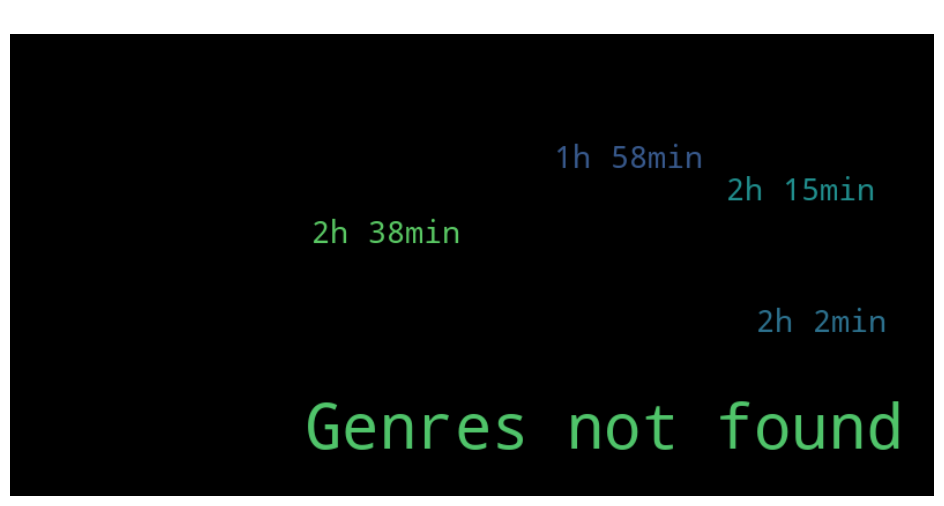

In [67]:
# Plot the word cloud for movies
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.title('Top Genres for Movies', fontsize=16, color='white')
plt.axis('off')
plt.show()


In [68]:
# Generate a word cloud for TV shows
wordcloud_tv_shows = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
).generate_from_frequencies(top_genres_tv_shows)


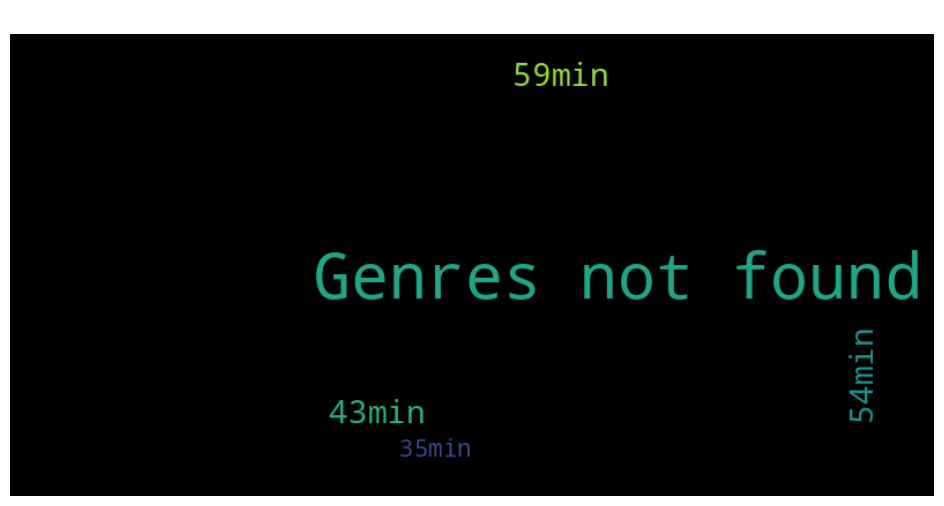

In [69]:
# Plot the word cloud for TV shows
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tv_shows, interpolation='bilinear')
plt.title('Top Genres for TV Shows', fontsize=16, color='white')
plt.axis('off')
plt.show()


## **Finding Predominant Streaming Service**

In [70]:
# Write Your Code here
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [71]:
# Extract streaming services for movies and TV shows
streaming_services_movies = movies_dataframe['movies_streaming_availability'].str.split(', ', expand=True).stack().value_counts()
streaming_services_tv_shows = tv_shows_dataframe['tv_shows_streaming_availability'].str.split(', ', expand=True).stack().value_counts()


In [72]:
#Let's Visvalize it using word cloud
# Generate a word cloud for streaming services in movies
wordcloud_movies_services = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='plasma',
    max_words=100,
    contour_width=3,
    contour_color='orange',
).generate_from_frequencies(streaming_services_movies)


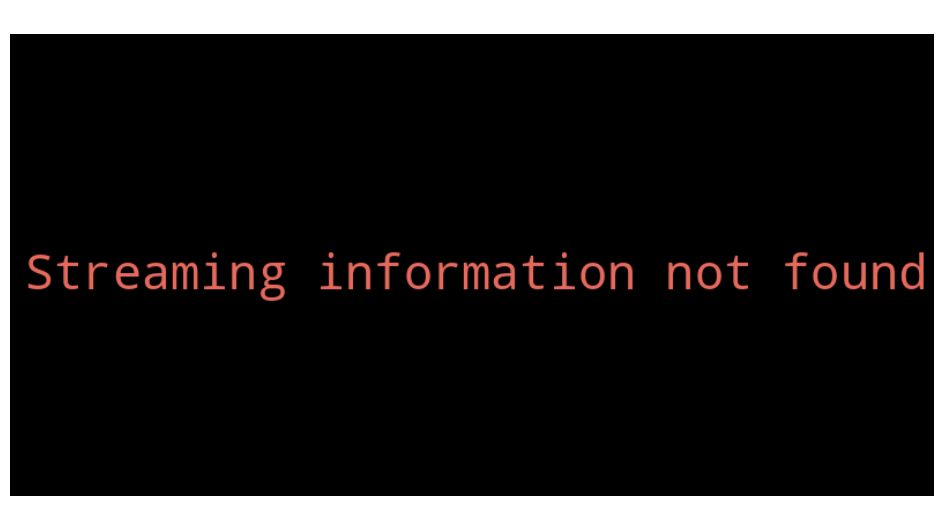

In [73]:
# Plot the word cloud for streaming services in movies
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_movies_services, interpolation='bilinear')
plt.title('Predominant Streaming Services for Movies', fontsize=16, color='white')
plt.axis('off')
plt.show()

In [74]:
# Generate a word cloud for streaming services in TV shows
wordcloud_tv_shows_services = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='plasma',
    max_words=100,
    contour_width=3,
    contour_color='orange',
).generate_from_frequencies(streaming_services_tv_shows)

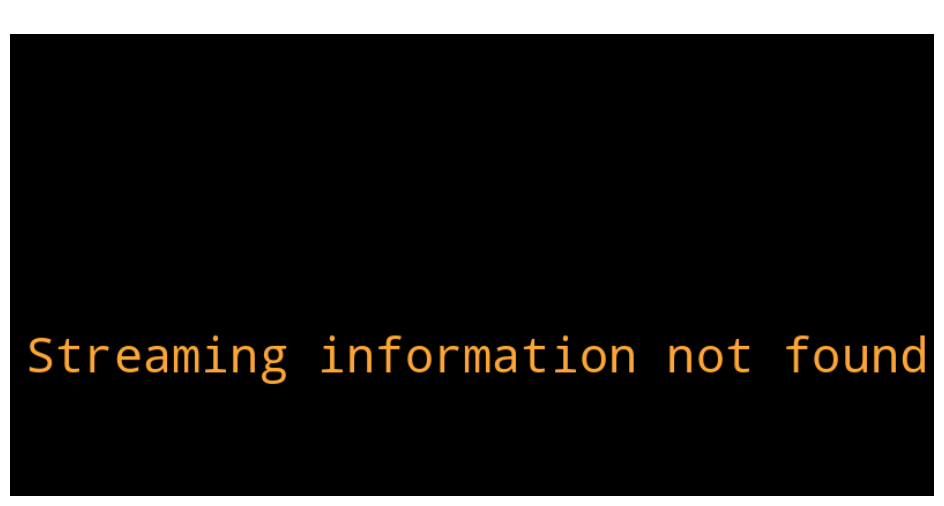

In [75]:
# Plot the word cloud for streaming services in TV shows
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tv_shows_services, interpolation='bilinear')
plt.title('Predominant Streaming Services for TV Shows', fontsize=16, color='white')
plt.axis('off')
plt.show()


## **Task 3 :- Data Export**

In [76]:
#saving final dataframe as Final Data in csv format
# Save filtered movies dataframe to CSV
movies_dataframe.to_csv('movies_data.csv', index=False)

# Save filtered TV shows dataframe to CSV
tv_shows_dataframe.to_csv('tv_shows_data.csv', index=False)

In [77]:
#saving filter data as Filter Data in csv format
# Save filtered movies dataframe to CSV
sorted_and_filterd_movies.to_csv('filtered_movies_data.csv', index=False)

# Save filtered TV shows dataframe to CSV
sorted_and_filterd_tv_shows.to_csv('filtered_tv_shows_data.csv', index=False)


# **Dataset Drive Link (View Access with Anyone) -**

https://drive.google.com/drive/folders/1xaHxJb3SQRB61DrOekgIF8I9wpE0JHc7?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***